In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [61]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [62]:
df.drop(columns=["RowNumber","Surname","CustomerId"],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

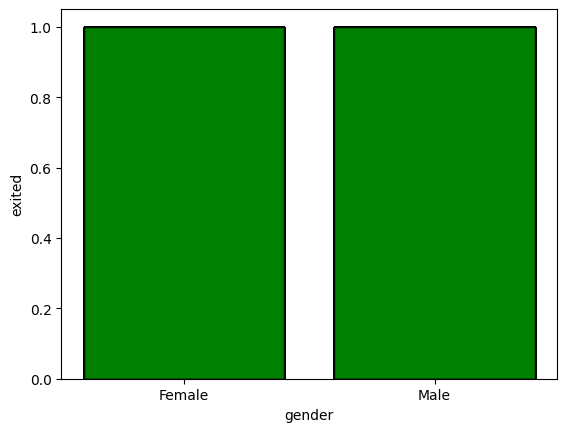

In [28]:
plt.bar(df["Gender"],df["Exited"], color="green",edgecolor="black",alpha=0.7)
plt.xlabel("gender")
plt.ylabel("exited")
plt.legend

Text(0, 0.5, 'count')

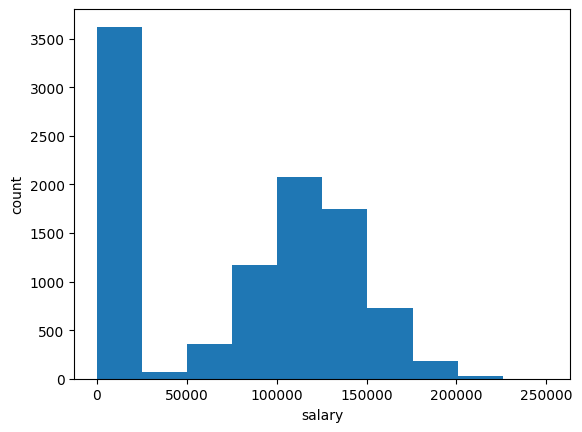

In [ ]:
plt.hist(df["Balance"])
plt.xlabel("Balance")
plt.ylabel("count")

2

C:\Users\saksh\AppData\Local\Temp\ipykernel_19884\1932432273.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=df, palette="pastel")


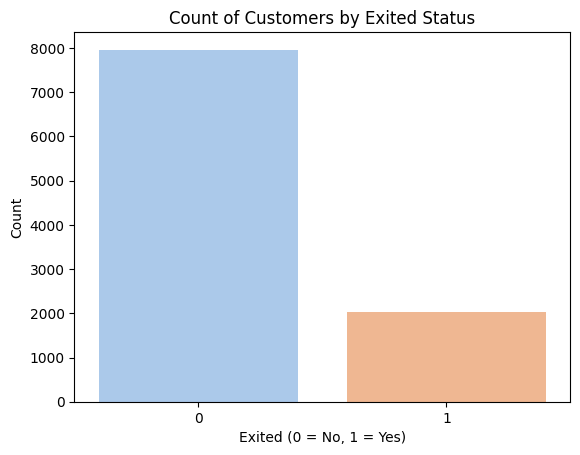

In [37]:
sns.countplot(x="Exited", data=df, palette="pastel")
plt.title("Count of Customers by Exited Status")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [63]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Exited"]),df["Exited"],test_size=0.2,random_state=2)

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# --- Step 1: One-Hot Encode Categorical Features ---
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

x_train_cat = ohe.fit_transform(x_train[["Geography", "Gender"]]).toarray()
x_test_cat = ohe.transform(x_test[["Geography", "Gender"]]).toarray()

# --- Step 2: Scale Numerical Features ---
scaler = StandardScaler()

# Drop categorical columns and get numerical values
x_train_num = x_train.drop(columns=["Geography", "Gender"]).values
x_test_num = x_test.drop(columns=["Geography", "Gender"]).values

# Fit scaler on training numerical features
x_train_scaled = scaler.fit_transform(x_train_num)

# Transform test numerical features
x_test_scaled = scaler.transform(x_test_num)

# --- Step 3: Combine Scaled Numerical and Encoded Categorical Features ---
x_train = np.hstack((x_train_scaled, x_train_cat))
x_test = np.hstack((x_test_scaled, x_test_cat))


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
mlg=LogisticRegression()
mlg=mlg.fit(x_train,y_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],           # Regularization strength
    'penalty': ['l2'],                 # Only 'l2' is supported for solver='lbfgs'
    'solver': ['lbfgs']                # Solver choice
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=mlg, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best model and parameters
y_pred = best_model.predict(x_test)
print("Best Score (cross-validated):", grid_search.best_score_)
from sklearn.metrics import accuracy_score;
accuracy_score(y_pred,y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score (cross-validated): 0.8106249999999999


0.8145

In [71]:
from sklearn.tree import DecisionTreeClassifier
mdt=DecisionTreeClassifier(max_depth=6)
mdt.fit(x_train,y_train)
y_pred=mdt.predict(x_test)
accuracy_score(y_pred,y_test)

0.851

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize the model
rf = RandomForestClassifier(random_state=42)

# Step 2: Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Step 3: Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',  # or 'f1', 'roc_auc' for imbalance
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Step 4: Fit the model
grid_search.fit(x_train, y_train)

# Step 5: Results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
# Get the best model
best_rf = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(x_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.8664999999999999
Test Accuracy: 0.8575
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1617
           1       0.72      0.41      0.53       383

    accuracy                           0.86      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000

